In [17]:
# Import libraries
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [14]:
df = pd.read_csv('csv/chicken_egg.csv')

# Isolate eggs and chickens
eggs = df.loc[:,'egg']
chickens = df.loc[:,'chicken']

<Axes: >

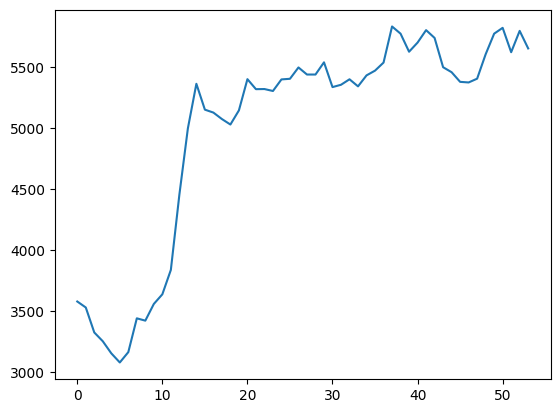

In [16]:
# Visualize eggs
eggs.plot()

<Axes: >

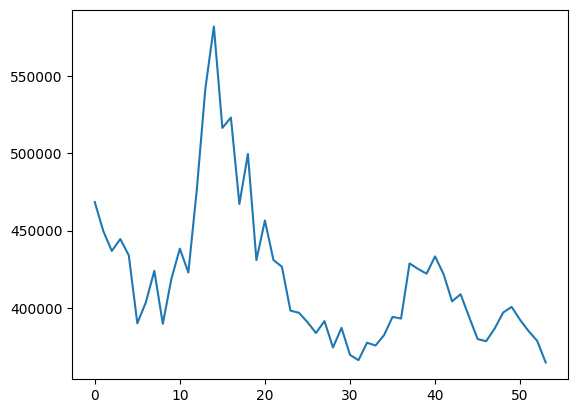

In [15]:
# Visualize Chickens
chickens.plot()

In [22]:
# Check stationarity for egss
stationary_eggs = adfuller(eggs)
print('p-value: %F' % stationary_eggs[1])

p-value: 0.423186


In [23]:
# Check stationarity for egss
stationary_chickens = adfuller(chickens)
print('p-value: %F' % stationary_chickens[1])

p-value: 0.300495


In [28]:
# Make data stationary
deggs = eggs - eggs.shift(1)
deggs = deggs.dropna()

stationary_deggs = adfuller(deggs)
print('p-value: %F' % stationary_deggs[1])

p-value: 0.000067


In [29]:
# Make data stationary
dchickens = chickens - chickens.shift(1)
dchickens = dchickens.dropna()

stationary_dchickens = adfuller(dchickens)
print('p-value: %F' % stationary_dchickens[1])

p-value: 0.003168


In [36]:
# Transform series into dataframe
df_deggs = pd.DataFrame(deggs)
df_dchickens = pd.DataFrame(dchickens)

# Create two dataframes
df_chicken = pd.concat([df_dchickens, df_deggs], axis = 1)
df_eggs = pd.concat([df_deggs, df_dchickens], axis = 1)